
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/medical-charges.csv")

In [6]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


1. На основі bmi - ймовірно, поки вищій показник має найменші чарджі
2. Регіон - попередньо середнє значення південного сходу має найменше чарджів
3. Діти - можливо припустити, що при наявності дітей чаржі нижчі
4. Вік + стать - чоловіки більш старшого віку платять вищі чарджі

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [7]:
import plotly.express as px

# Створення гістограми з розбиттям за статтю (sex)
fig_sex = px.histogram(df, x='charges', color='sex', marginal='box',
                       title='Розподіл медичних зборів за статтю',
                       labels={'charges': 'Медичні збори', 'sex': 'Стать'},
                       hover_data=df.columns)

# Відображення графіку
fig_sex.show()

# Створення гістограми з розбиттям за регіоном (region)
fig_region = px.histogram(df, x='charges', color='region', marginal='box',
                          title='Розподіл медичних зборів за регіоном',
                          labels={'charges': 'Медичні збори', 'region': 'Регіон'},
                          hover_data=df.columns)

# Відображення графіку
fig_region.show()

Розподіл за статтю (sex):

Гістограма показує, як медичні збори розподіляються між різними статями. Очевидно, що і у жінок, і у чоловіків більша кількість чарджів розподілена від 2 до 14 тисяч. Інші суми зустрічаються рідше і графік скошений вправо.Чоловіки також завжди мають більше чарджів, хоча медіана насправді майже однакова. Судячи з усього у жінок є більше викидів.

Розподіл за регіоном (region):

Гістограма показує, як медичні збори розподіляються між різними регіонами.
Найбільше чарджів спостерігаєму на північному сході, найменше на південному заході. Теж саме явище і з медіаною цих 2 районів. На південному заході також найменші суми платежів.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [8]:
# Розподіл за регіоном (region)
fig_region = px.histogram(df, x='region', color='smoker',
                          title='Розподіл медичних зборів за регіоном та курінням',
                          labels={'region': 'Регіон', 'smoker': 'Курець', 'count': 'Кількість'},
                          barmode='group')

# Відображення графіку
fig_region.show()

# Розподіл за кількістю дітей (children)
fig_children = px.histogram(df, x='children', color='smoker',
                             title='Розподіл медичних зборів за кількістю дітей та курінням',
                             labels={'children': 'Кількість дітей', 'smoker': 'Курець', 'count': 'Кількість'},
                             barmode='group')

# Відображення графіку
fig_children.show()

Курці найбільше платять на південномусході та за відсутності дітей. В принципі, спостерігається зменшення кількості оплат зі зростанням кількості дітей, але, можливо, людей з більшою кількістю дітей набагато менше. Не курці платять більше незалежно від регіону, але, можливо, цифра некурців збільшена. Кількість некурців у різних районах досить наближена.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [9]:
# Графік-скрипка для зв'язку між charges та children
fig = px.violin(df, y='charges', x='children',
                 title='Звʼязок між медичними зборами та кількістю дітей',
                 labels={'charges': 'Медичні збори', 'children': 'Кількість дітей'})

# Відображення графіку
fig.show()

З графіку можна сказати, що найбільш широко представлені платежі сумою від 1000 до максимум 20000, але найбільш поширене значення для всіх близько 10000. Вищі суми зустрічаються рідше. Найменший розподіл знову ж таки за більшої кількості дітей. Але важливо розуміти, що сама кількість осіб з великою кількістю дітей (від 2 і більше) не така часта.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [11]:
non_smoker_df = df[df.smoker == 'no']

In [12]:
def estimate_charges(age, w, b):
    return w * age + b

In [21]:
import matplotlib.pyplot as plt
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

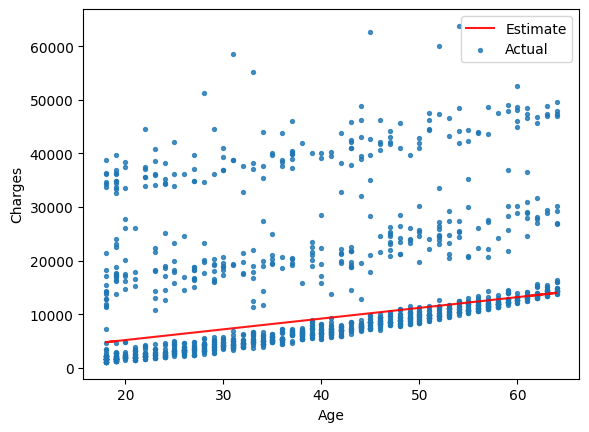

In [25]:
try_parameters(df, 200, 1200)

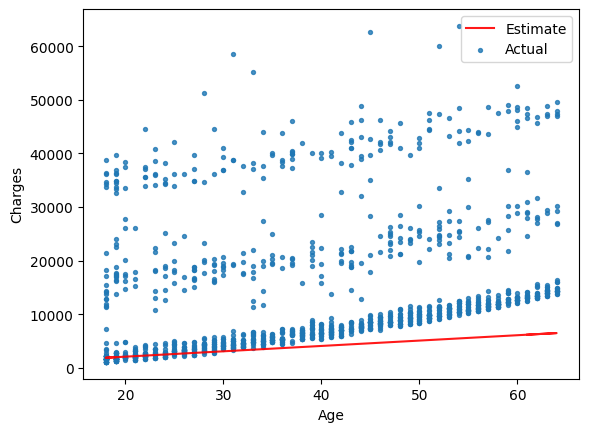

In [76]:
try_parameters(df, 100, 100)

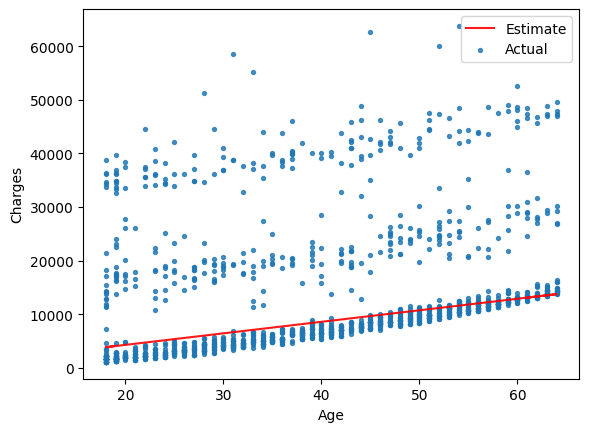

In [147]:
try_parameters(df, 215, 0)

Цікаво, але бачимо що 3-тя комбінація 215 та 0 досить наближені до графіку. Можна сказати, що така опція досить підігнана під модель.

Якщо застосувати ці параметри 𝑤 = 215 і 𝑏 = 0 до моделі, то це означатиме, що кожен рік віку співвідноситься з медичними зборами у сумі 215 одиниць, і при цьому відсутні будь-які початкові збори (тобто, якщо вік дорівнює 0, то збори також дорівнюватимуть 0).

Це вказує на те, що з віком медичні збори збільшуються на 215 одиниць на рік.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [148]:
def calculate_rmse(y_true, y_pred):
    """Обчислює Root Mean Squared Error (RMSE) для заданих спостережень та передбачень."""
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse1 = calculate_rmse(no_smoker_df['charges'], estimate_charges(no_smoker_df['age'], w=200, b=1200))
rmse2 = calculate_rmse(no_smoker_df['charges'], estimate_charges(no_smoker_df['age'], w=100, b=100))
rmse3 = calculate_rmse(no_smoker_df['charges'], estimate_charges(no_smoker_df['age'], w=215, b=0))

print("RMSE 1:", rmse1)
print("RMSE 2:", rmse2)
print("RMSE 3:", rmse3)

RMSE 1: 4800.863994262567
RMSE 2: 6826.734303208685
RMSE 3: 4720.280015611947


RMSE 3 був максимально наближеним на графіку і тому дав найменше значення втрат. Судячи з значень лекції така опція дає досить непоганий результат.